<div>
<img src="https://blogs.qub.ac.uk/wp-content/uploads/2018/05/qub_logo_land.png" width="200", align="left">
</div>

Code used for Chapter 5 should be placed in this notebook. Please explain your thought process / interpretation of plots where you think it would be useful by using Markdown cells.

*Before using this notebook, please read [Jupyter Notebook 101](https://www.kaggle.com/code/jhoward/jupyter-notebook-101)*. 

Student Name: Benjamin Graham
Student Number: 40038234

# Chapter 5

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

## 5.1 Causal Relationships

### Overview

To examine potential causal relationships, I will first load the dataset into a pandas DataFrame. Next, I will create pair plots to visualize all possible combinations of columns. This will help identify any strong correlations and provide a comprehensive overview of the data.

In [3]:
df = pd.read_csv('supermarkets_cleaned.csv')
df.head()

,supermarket,price,price_per_unit,unit,product_name,category,own_brand,customer_satisfaction,supermarket_total_products,supermarket_total_own_brand_products,price_per_product,price_per_own_brand_product
0,Aldi,1.69,0.37,kg,Plant Menu Vegetable Burgers 454g/4 Pack,free-from,False,73,5058,0,2.27,0.0
1,Aldi,1.69,0.37,kg,Plant Menu Spicy Bean Burgers 454g/4 Pack,free-from,False,73,5058,0,2.27,0.0
2,Aldi,1.69,3.70,kg,Plant Menu No Chicken Burgers 227g/2 Pack,free-from,False,73,5058,0,2.27,0.0
3,Aldi,1.69,7.40,kg,Veggie Menu Bean & Vegetable Burgers 227g/2 Pack,free-from,False,73,5058,0,2.27,0.0
4,Aldi,1.49,3.70,kg,Plant Menu No Chicken Pies 2x200g,free-from,False,73,5058,0,2.27,0.0


In [4]:
df.columns

Index(['supermarket', 'price', 'price_per_unit', 'unit', 'product_name',
       'category', 'own_brand', 'customer_satisfaction',
       'supermarket_total_products', 'supermarket_total_own_brand_products',
       'price_per_product', 'price_per_own_brand_product'],
      dtype='object')

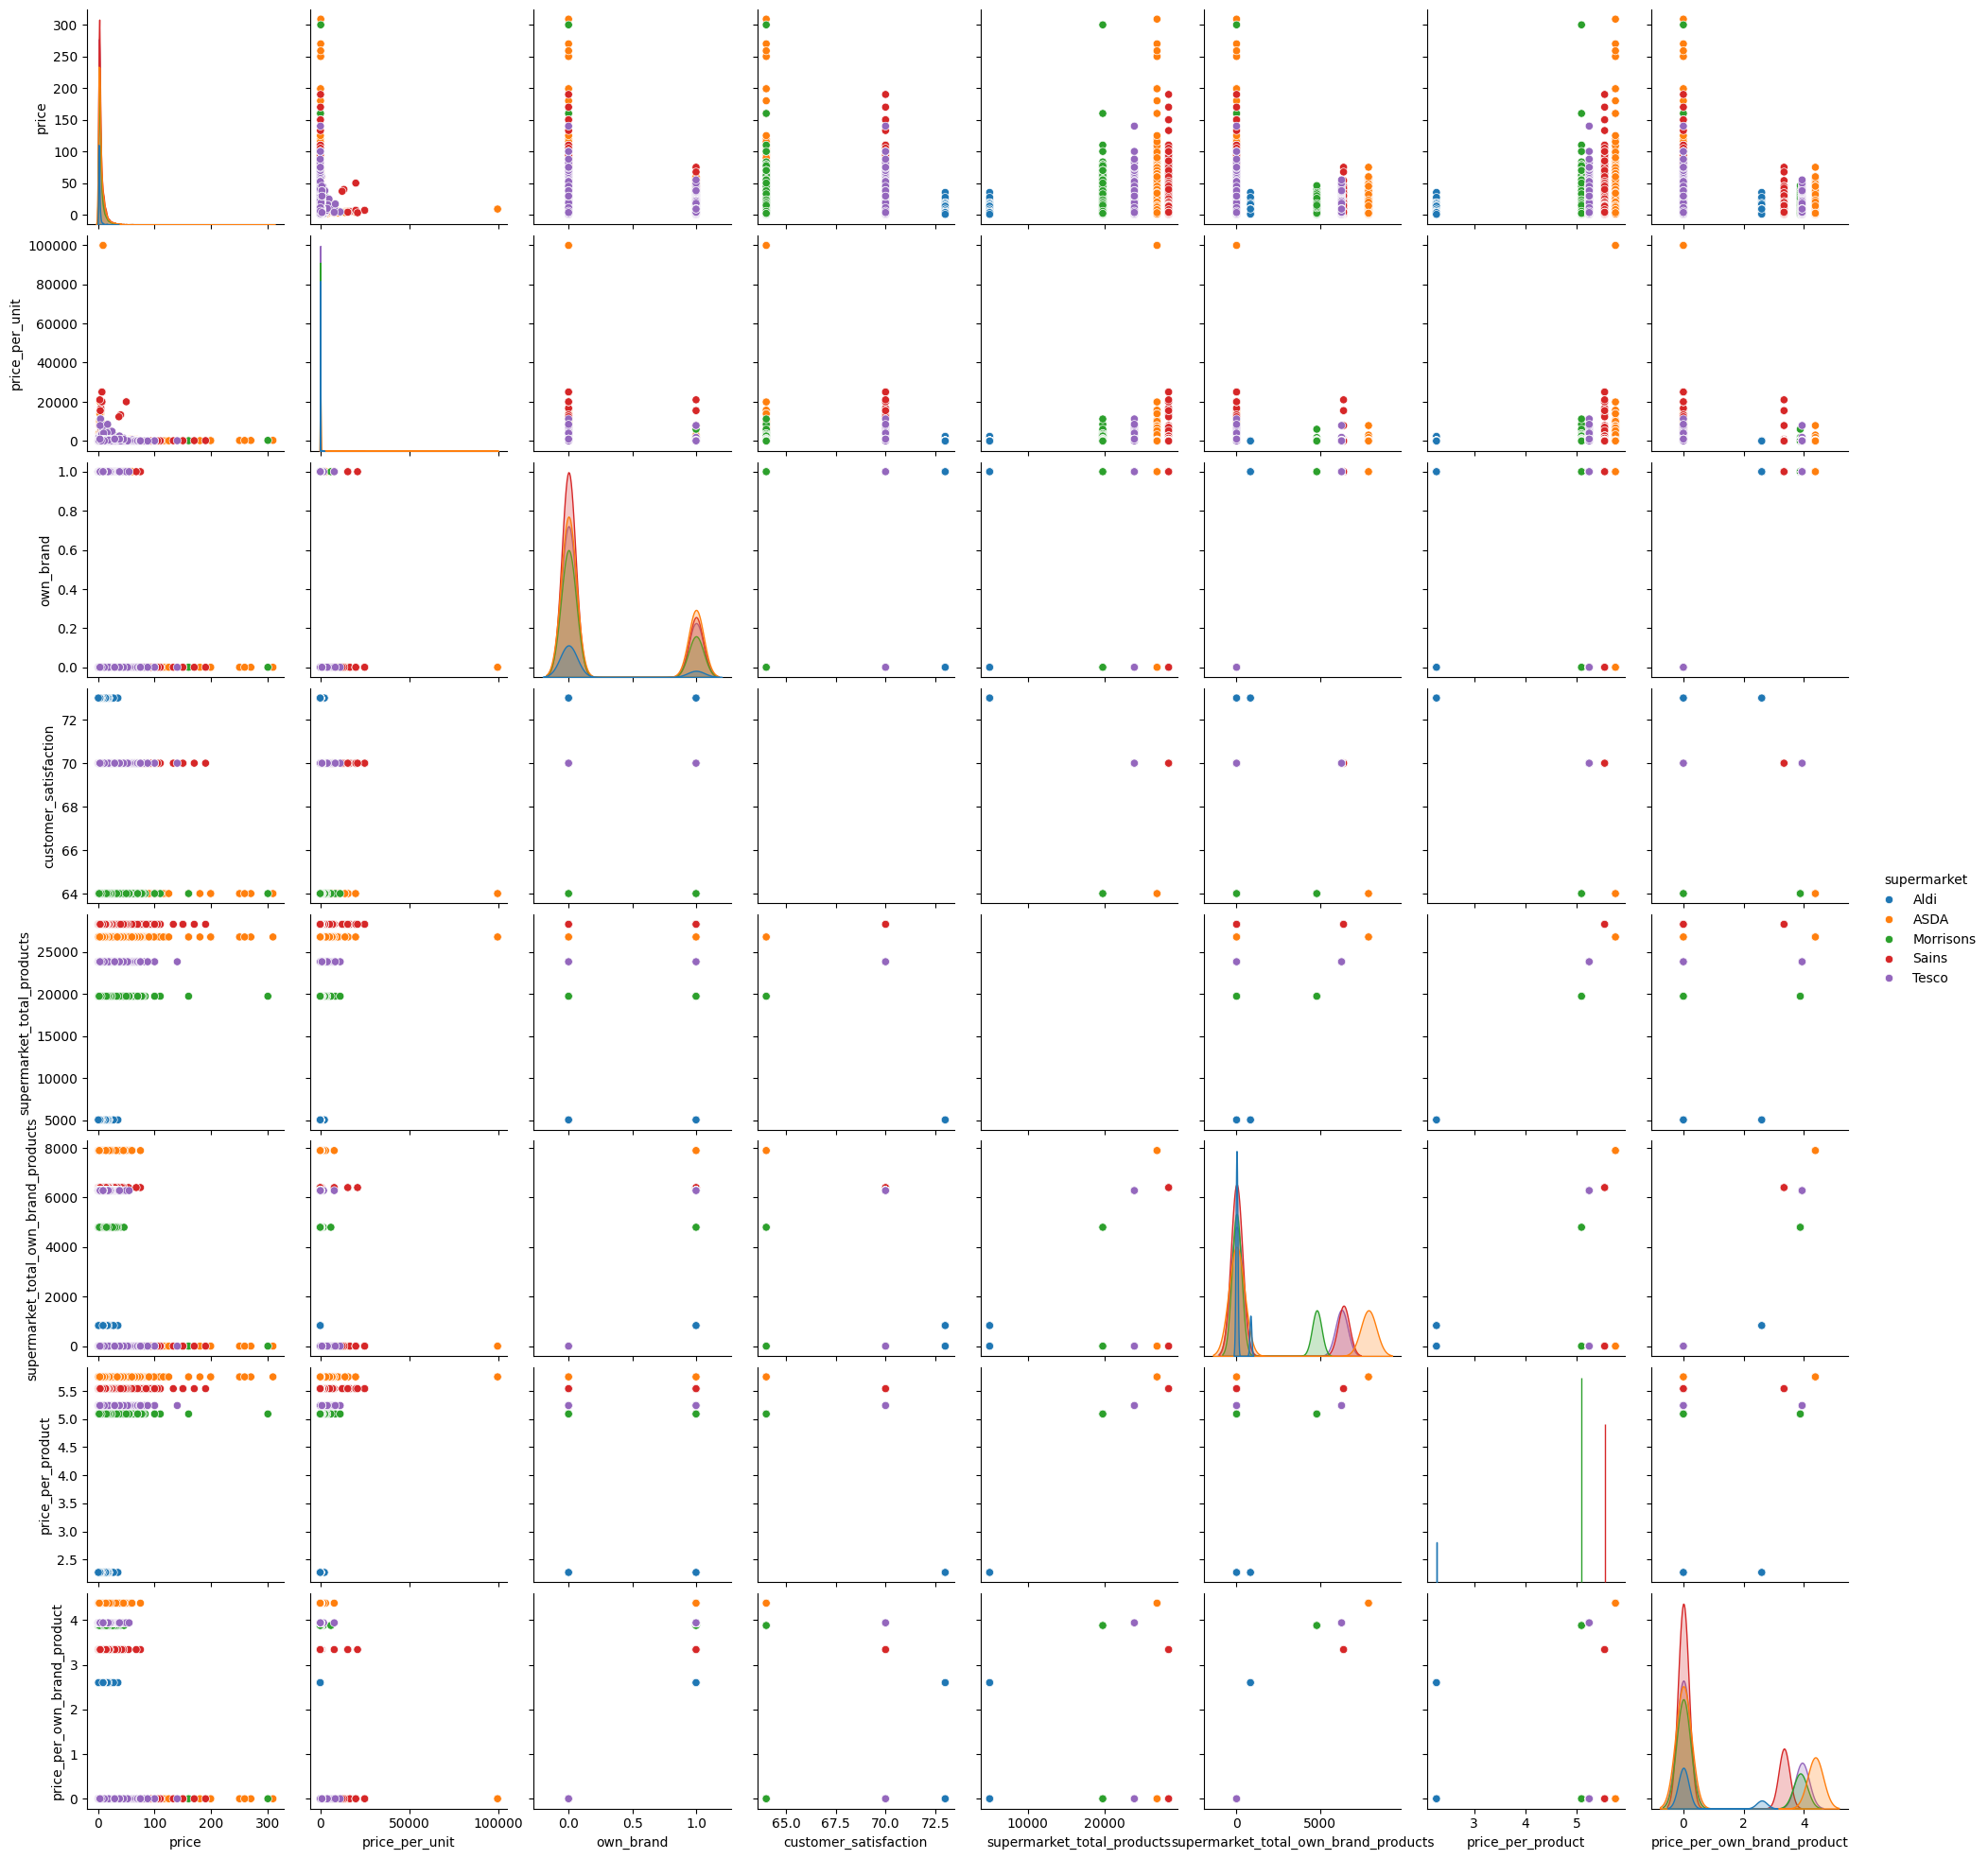

In [5]:
sns.pairplot(df, hue='supermarket')
plt.savefig('pairplot.png')

Although we have no strong correlations in the pair plots, others reveal possible causal relationships. Many of these plots exhibit categorical bands, due to the limited data points within the columns for aggregated statistics and the customer satisfaction scores that I added to the dataset. Despite the limited data points for the customer satisfaction metric, it provides valuable insights, suggesting potential causal factors.

Let's begin by examining the pair plots that display 'customer_satisfaction' against other columns, in order to identify any potential causal relationships.

#### Price vs. Customer Satisfaction

Below is the scatter plot illustrating the relationship between Price and Customer Satisfaction. In the following section, I will adjust the axes to place Customer Satisfaction on the y-axis and the causal factor on the x-axis. This adjustment aims to enhance the visualisation of how the metric of value can be influenced.

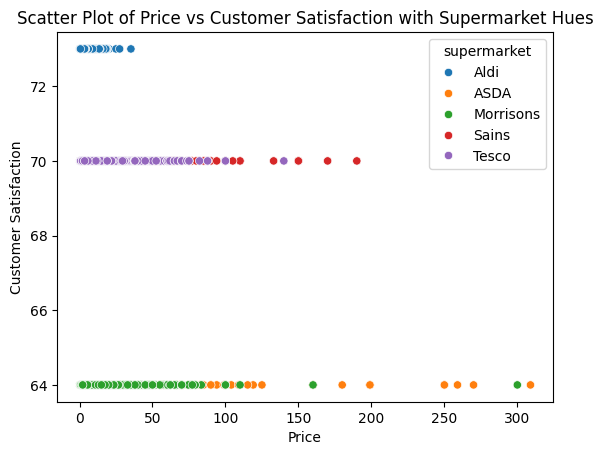

In [68]:
sns.scatterplot(data=df, x='price', y='customer_satisfaction', hue='supermarket')
plt.xlabel('Price')
plt.ylabel('Customer Satisfaction')
plt.title('Scatter Plot of Price vs Customer Satisfaction with Supermarket Hues')
plt.savefig('cs_price_plot.png')
plt.show()

These bands occur because the continuous price values are grouped by the categorical customer satisfaction values. The customer satisfaction scores are essentially categorical due to the limited number of data points available for them in the dataset.

In the scatter plot, there are distinct clusters for different supermarkets, indicated by various colours. For customer satisfaction scores around 64, the prices show a wide spread, indicating a broader distribution of prices. This means that while all supermarkets have products at the lower end of the price scale, those with lower customer satisfaction scores also exhibit a significant number of higher-priced products. For scores around 70, prices are more tightly clustered, reflecting a narrower distribution. For scores around 72, the distribution is even narrower, with prices being consistently low. This analysis highlights the varying price distributions rather than suggesting that any supermarket generally has higher or lower prices. For the latter, it is more worthwhile to look at price per product, which is effectively the mean price for each supermarket.

Analysing the relationship between the distribution of prices and customer satisfaction is valuable because it enables supermarkets to align their pricing strategies with customer expectations, directly impacting satisfaction levels. While it is clear that other factors also influence customer satisfaction, understanding the price-satisfaction dynamic helps businesses identify optimal pricing distributions that maximise customer satisfaction, thereby enhancing loyalty and retention. For an industry expert who prioritises customer satisfaction, these insights are crucial for maintaining competitive advantage and ensuring long-term business success.

#### Price Per Product vs Customer Satisfaction

Now I will look at the scatter plot for price per product and customer satisfaciton. 

In [69]:
df['price_per_product'].unique()

array([2.27, 5.75, 5.09, 5.54, 5.24])

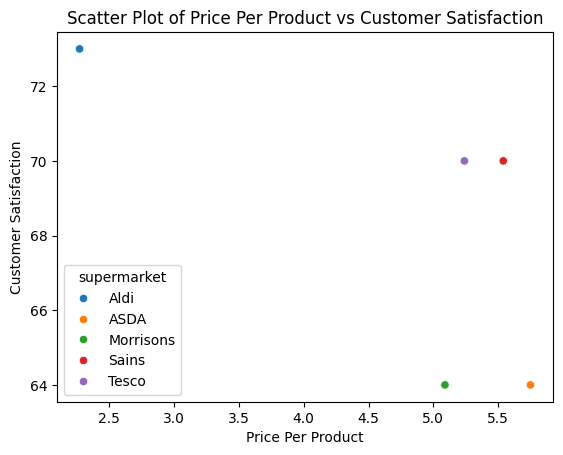

In [70]:
sns.scatterplot(data=df, x='price_per_product', y='customer_satisfaction', hue='supermarket')
plt.xlabel('Price Per Product')
plt.ylabel('Customer Satisfaction')
plt.title('Scatter Plot of Price Per Product vs Customer Satisfaction')
plt.savefig('cs_price_per_product_plot.png')
plt.show()

The plot suggests an inverse relationship between average price per product and customer satisfaction. Supermarkets like Aldi, offering lower average prices, achieve higher satisfaction scores around 72, while ASDA and Morrisons, with higher average prices, have lower scores around 64. Sainsbury's and Tesco show moderate satisfaction around 70 despite having high prices, indicating that factors beyond pricing also influence satisfaction.

#### Total Products Per Supermarket vs Customer Satisfaction

Now let's consider the scatter plot for total products per supermarket and customer satisfaction.

In [77]:
df['supermarket_total_products'].unique()

array([ 5058, 26758, 19725, 28263, 23820])

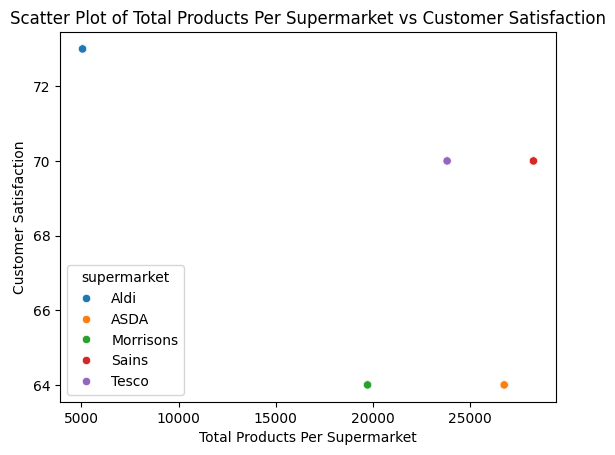

In [71]:
sns.scatterplot(data=df, x='supermarket_total_products', y='customer_satisfaction', hue='supermarket')
plt.xlabel('Total Products Per Supermarket')
plt.ylabel('Customer Satisfaction')
plt.title('Scatter Plot of Total Products Per Supermarket vs Customer Satisfaction')
plt.savefig('cs_total_products_plot.png')
plt.show()

The plot suggests an inverse relationship between the number of products offered and customer satisfaction. Aldi, with the fewest products at 5,058, achieves the highest satisfaction score of 72, while ASDA and Morrisons, with the a much higher number of products, have lower scores around 64. Sainsbury’s and Tesco show higher satisfaction scores around 70 despite offering similar product ranges to ASDA and Morrisons (Sainsburys actually have the highest total number of products), indicating that factors beyond product quantity also influence satisfaction. 

#### Total Own Brand Products Per Supermarket vs Customer Satisfaction

In [73]:
df['supermarket_total_own_brand_products'].unique()

array([   0,  831, 7894, 4798, 6401, 6280])

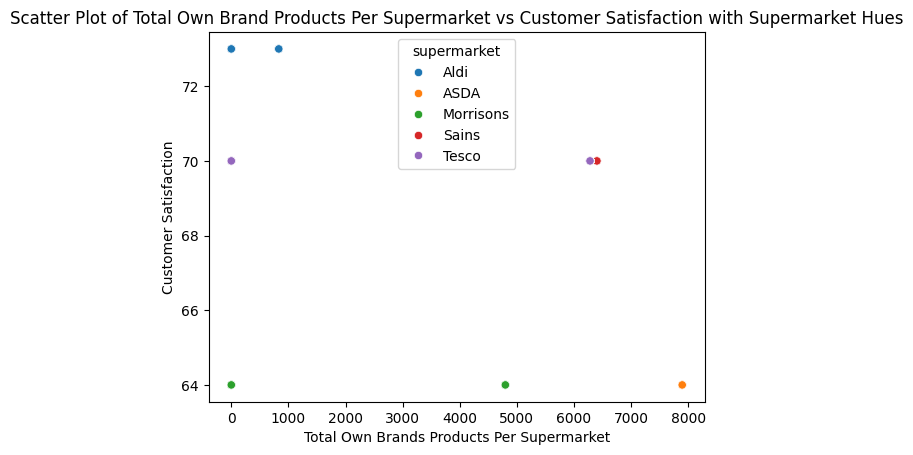

In [74]:
sns.scatterplot(data=df, x='supermarket_total_own_brand_products', y='customer_satisfaction', hue='supermarket')
plt.xlabel('Total Own Brands Products Per Supermarket')
plt.ylabel('Customer Satisfaction')
plt.title('Scatter Plot of Total Own Brand Products Per Supermarket vs Customer Satisfaction with Supermarket Hues')
plt.savefig('cs_total_own_brand_products_plot.png')
plt.show()

The plot suggests an inverse relationship between the number of own brand products offered and customer satisfaction. Aldi, with the fewest own brand products at approximately 831, achieves the highest satisfaction score of 72, while ASDA and Morrisons, with a higher amount of own brand products (around 7,894 and 4,798 respectively), have lower scores around 64. Sainsbury’s and Tesco, with a similar total number of own brand products to ASDA and Morrisons, maintain higher satisfaction scores around 70, indicating that factors beyond product quantity also influence satisfaction.

#### Total Price Per Own Brand Product vs Customer Satisfaction

In [75]:
df['price_per_own_brand_product'].unique()

array([0.  , 2.6 , 4.38, 3.88, 3.34, 3.94])

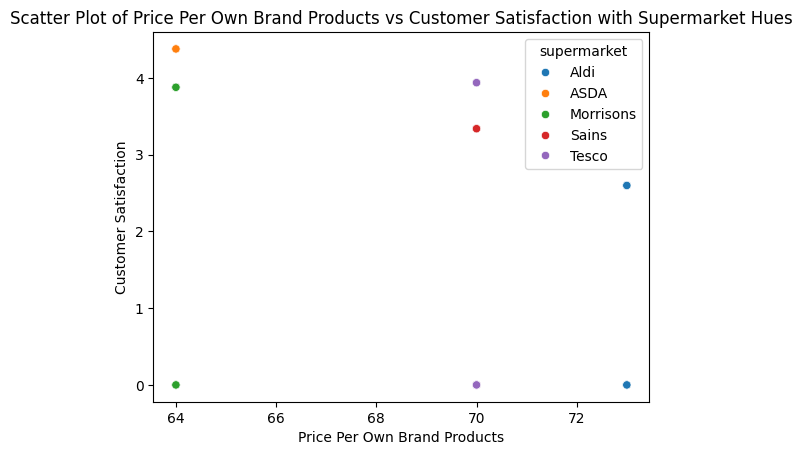

In [76]:
sns.scatterplot(data=df, x='customer_satisfaction', y='price_per_own_brand_product', hue='supermarket')
plt.xlabel('Price Per Own Brand Products')
plt.ylabel('Customer Satisfaction')
plt.title('Scatter Plot of Price Per Own Brand Products vs Customer Satisfaction with Supermarket Hues')
plt.savefig('cs_price_own_brand.png')
plt.show()

The plot suggests an inverse relationship between the average price per own brand product and customer satisfaction. Aldi, with the lowest average price at approximately £2.60, achieves the highest satisfaction score of 72. ASDA and Morrisons, with the highest average prices around £4.38 and £3.88 respectively, have lower scores around 64. Sainsbury’s and Tesco show higher satisfaction scores around 70 despite having higher average prices (Sainsbury's is actually higher than Morrisons), indicating that factors beyond pricing also influence satisfaction.

#### Conclusion

Although these scatter plots are limited by the number of data points and indicate the presence of other causal factors influencing customer satisfaction that we don't have data for, a clear trend emerges. Lower prices and smaller product ranges, both for own brand and non-own brand products, correlate with higher customer satisfaction scores. Analysing these relationships helps supermarkets refine their pricing strategies and product offerings, ultimately enhancing customer satisfaction, supporting better decision-making, and gaining a competitive advantage.

### Probability-Based Analysis

As suggested above, here is a list of the possible causal relationships that I will investigate in more detail:
    
* **Customer Rating vs. Price**: Examining the relationship between customer satisfaction scores and overall price levels can reveal whether lower or higher prices correlate with customer satisfaction. This insight is crucial for supermarkets to adjust their pricing strategies to enhance customer satisfaction.

* **Customer Rating vs. Price Per Product**: Investigating how customer satisfaction scores vary with the price per product (mean price) helps understand if customers perceive value based on the overall pricing strategy of the supermarket. This can reveal whether customers are more satisfied with supermarkets that offer better value across a larger or smaller product range, guiding supermarkets in balancing their pricing strategies with their product assortment to enhance customer satisfaction.

* **Customer Rating vs. Total Products Per Supermarket**: Analysing the correlation between the total number of products offered and customer satisfaction scores can indicate if a wider variety of products influences satisfaction levels. This insight can help supermarkets decide whether to expand or reduce their product ranges to meet customer expectations.

* **Customer Rating vs. Total Own Brand Products Per Supermarket**: Exploring how the number of own brand products relates to customer satisfaction scores can reveal if having a larger selection of own brand products affects satisfaction. This can guide supermarkets in balancing the mix of own brand versus branded products to maximize customer satisfaction.

* **Customer Rating vs. Price Per Own Brand Product**: Investigating the relationship between the average price of own brand products and customer satisfaction scores can help understand if customers are more satisfied with lower-priced own brand products or seek more premium own brand products. This insight is essential for setting competitive prices for own brand items to enhance customer satisfaction.

In the following section, I will visualise these relationships in 2-dimensional density plots to estimate the probability of higher or lower customer satisfaction scores based on a given causal factor. It should be noted, however, that the limited number of data points for customer satisfaction significantly restricts my ability to provide accurate estimates. The lack of variance within customer satisfaction scores makes it particularly difficult to take vertical slices from the density plots for detailed examination.

#### Price vs Customer Satisfaction

I'll begin by visualising the probability density between the distribution of prices and customer satisfaction scores.

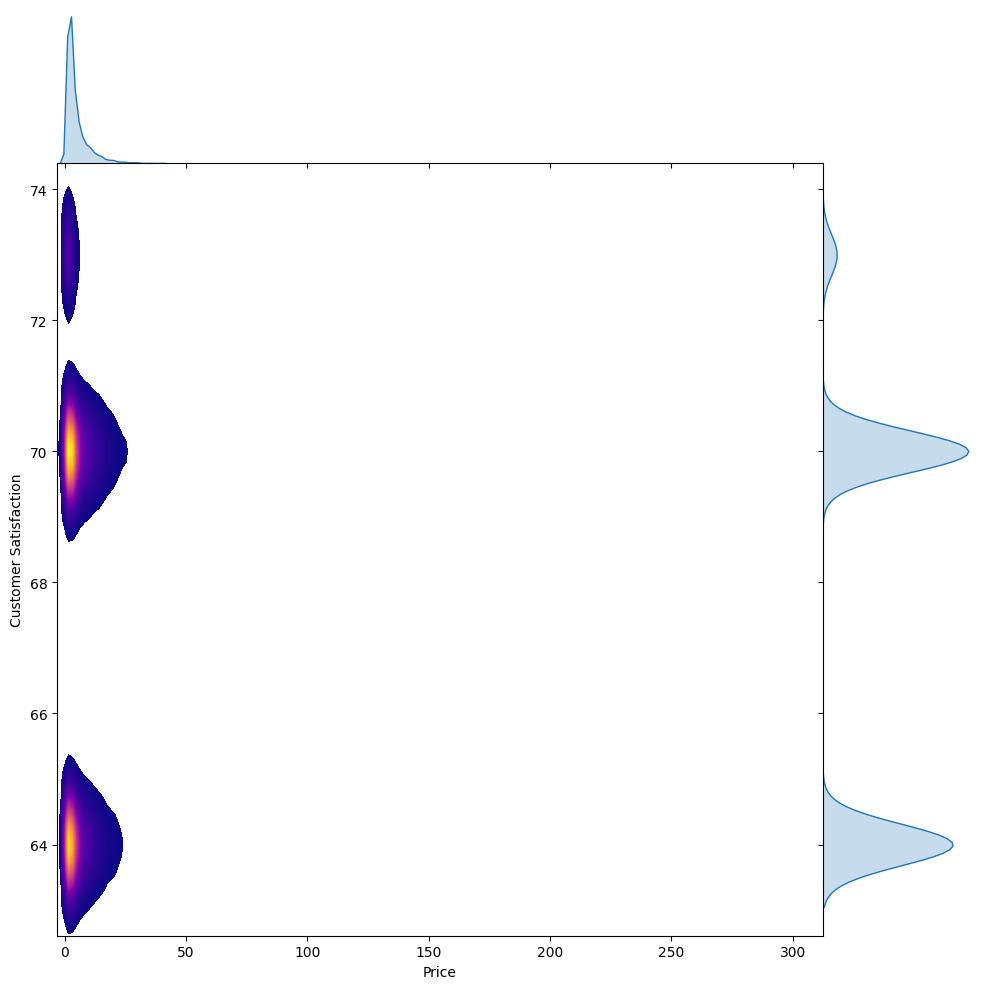

In [79]:
sns.jointplot(data=df, x='price', y='customer_satisfaction', kind='kde', fill=True, space=0, cmap='plasma', height=10, ratio=5, levels=100)
plt.xlabel('Price')
plt.ylabel('Customer Satisfaction')
plt.title('2D Density Plot of Price vs Customer Satisfaction')
plt.show()

Since, the densities are difficult to make out, let's limit the x-axis to prices up to £30.

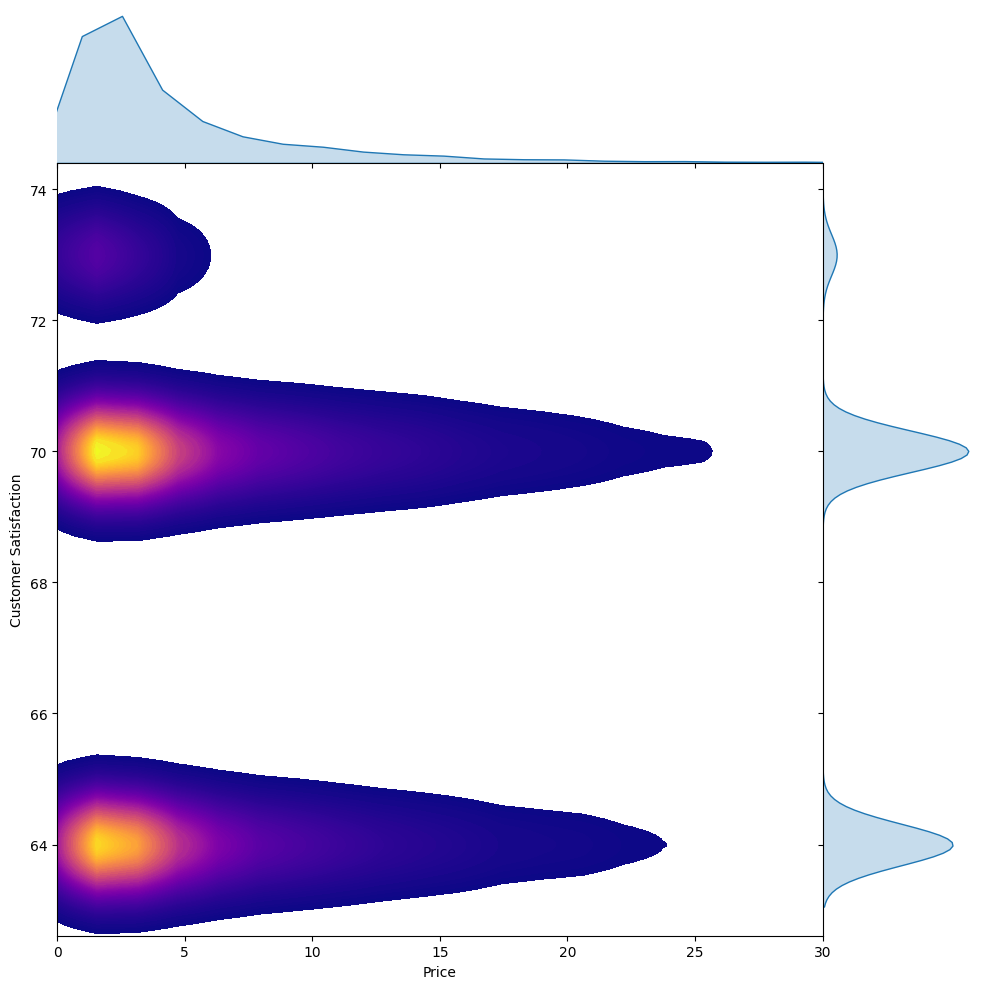

In [80]:
sns.jointplot(data=df, x='price', y='customer_satisfaction', kind='kde', fill=True, space=0, cmap='plasma', height=10, ratio=5, levels=100, xlim=(0, 30))
plt.xlabel('Price')
plt.ylabel('Customer Satisfaction')
plt.title('2D Density Plot of Price vs Customer Satisfaction')
plt.savefig('2d_price.png')
plt.show()

Looking closer reveals that, while all supermarkets in the dataset show a higher distribution of prices at lower price ranges, limiting their product range to exclude higher-priced products correlates with a higher probability of high customer satisfaction scores. Conversely, expanding product ranges to include higher-priced products indicates a higher probability of lower customer satisfaction scores.

However, this visualisation is limited by the fact that the density of customer satisfaction is influenced by the total number of products. Customer satisfaction scores were added to each row of the dataset, representing an individual product from one of the five supermarkets. Since Aldi has fewer products, the density doesn't extend to the right as much as the other supermarkets, which have a significantly higher range of products. Similarly, since ASDA and Morrisons both scored 64 on the customer satisfaction survey and Sainsbury's and Tesco both scored 70, the densities for each score reflect the combined total number of products for both pairs of supermarkets.


To examine the distribution or prices within each customer satisfaction score more closely, I will assign the product prices in the dataset to price ranges up to £30 and visualise these as hues inside a density plot for customer satisfaction.

In [88]:
price_ranges = [(0, 5), (5, 10), (10, 15), (15, 20), (20, 25), (25, 30)]

def categorise_price(price):
    for (low, high) in price_ranges:
        if low <= price < high:
            return f'{low}-{high}'
    return '30+'

df['price_range'] = df['price'].apply(categorise_price)
df.head()

,supermarket,price,price_per_unit,unit,product_name,category,own_brand,customer_satisfaction,supermarket_total_products,supermarket_total_own_brand_products,price_per_product,price_per_own_brand_product,price_range
0,Aldi,1.69,0.37,kg,Plant Menu Vegetable Burgers 454g/4 Pack,free-from,False,73,5058,0,2.27,0.0,0-5
1,Aldi,1.69,0.37,kg,Plant Menu Spicy Bean Burgers 454g/4 Pack,free-from,False,73,5058,0,2.27,0.0,0-5
2,Aldi,1.69,3.70,kg,Plant Menu No Chicken Burgers 227g/2 Pack,free-from,False,73,5058,0,2.27,0.0,0-5
3,Aldi,1.69,7.40,kg,Veggie Menu Bean & Vegetable Burgers 227g/2 Pack,free-from,False,73,5058,0,2.27,0.0,0-5
4,Aldi,1.49,3.70,kg,Plant Menu No Chicken Pies 2x200g,free-from,False,73,5058,0,2.27,0.0,0-5


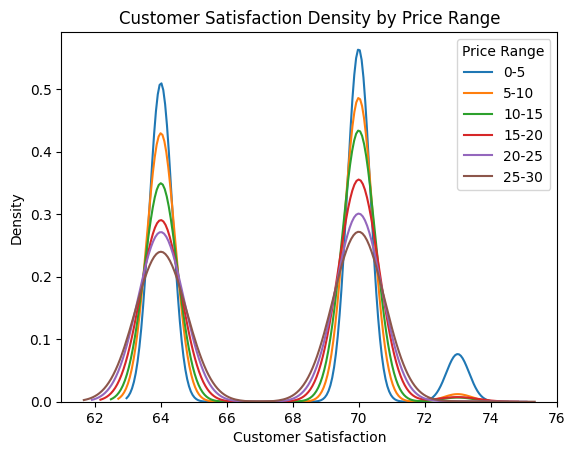

In [91]:
for (low, high) in price_ranges:
    range_label = f'{low}-{high}'
    subset = df[df['price_range'] == range_label]
    sns.kdeplot(subset['customer_satisfaction'], label=range_label)

plt.title('Customer Satisfaction Density by Price Range')
plt.xlabel('Customer Satisfaction')
plt.ylabel('Density')
plt.legend(title='Price Range')
plt.show()

Here we can see that supermarkets that received customer satisfaction scores of 73 (i.e. Aldi) have a much higher proportion of their prices within the range of £0 to £5 and relatively few products outside this range. In contrast, supermarkets with lower scores have a lower proportion of their prices within the £0 to £5 range. Despite most products falling within this range, these supermarkets still offer many products in more expensive price ranges, although the number of products decreases as the price increases. This indicates a higher probability of receiving higher customer satisfaction scores, the higher the proportion of products that fall in within the lowest price range of £0 to £5.

It should be noted that the supermarkets are not differentiated here. Thus, the customer satisfaction scores of 64 and 70 represent the combined prices of ASDA/Morrisons and Sainsbury's/Tesco, respectively.

#### Price Per Product vs Customer Satisfaction

Now let's visualise the probability density between the price per product (or mean price) and customer satisfaction. 

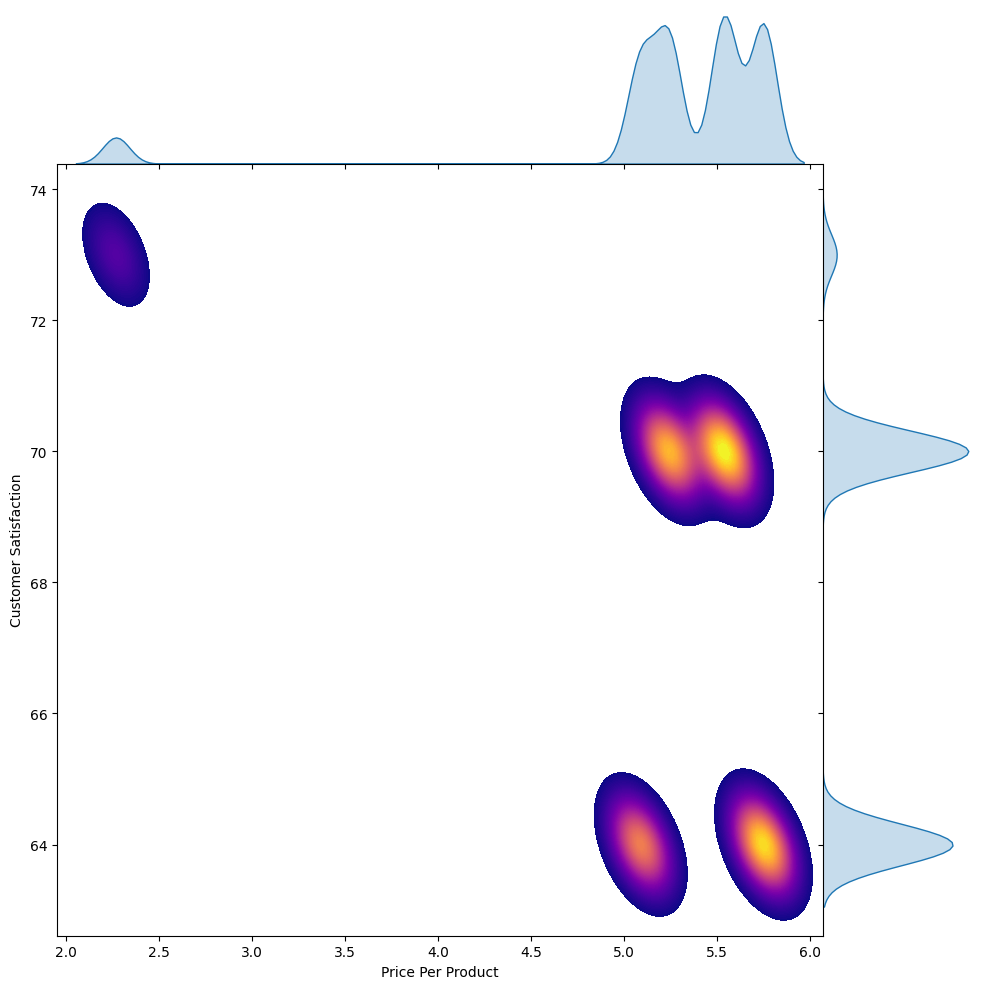

In [92]:
sns.jointplot(data=df, x='price_per_product', y='customer_satisfaction', kind='kde', fill=True, space=0, cmap='plasma', height=10, ratio=5, levels=100)
plt.xlabel('Price Per Product')
plt.ylabel('Customer Satisfaction')
plt.title('2D Density Plot of Price Per Product vs Customer Satisfaction')
plt.savefig('2d_price_pp.png')
plt.show()

While the price was normalised to remove the effect of the total number of products by calculating a mean price for each supermarket, adding it to the dataset as a column has reintroduced this effect. Each product now contains a price per product value, so the density plot visualises the distribution of products with particular price per product values, rather than solely the mean price per supermarket. In addition, the total number of products still has an effect on the customer satisfaction scores, for the reasons outlined above.

Given that there are so few data points for customer satisfaction, it effectively makes this variable categorical rather than continuous. Similarly, there are limited data points for price per product, as these are aggregate statistics. Therefore, it would be more effective to visualise this relationship using bar plots with hues for customer satisfaction scores.

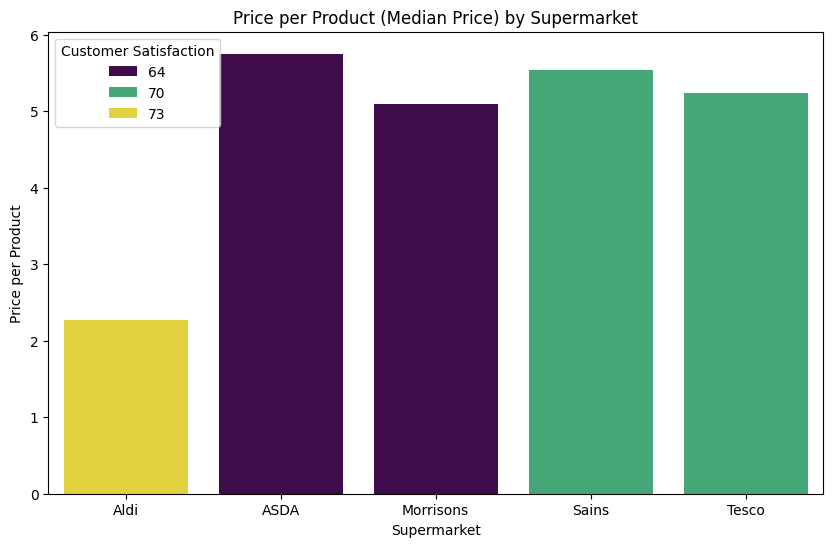

In [93]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='supermarket', y='price_per_product', hue='customer_satisfaction', palette='viridis')
plt.title('Price per Product (Median Price) by Supermarket')
plt.xlabel('Supermarket')
plt.ylabel('Price per Product')
plt.legend(title='Customer Satisfaction')
plt.savefig('11_bp_pp')
plt.show()

This bar plot visualises a higher probability that customer satisfaction increases as the price per product (or mean price) decreases. Therefore, there is a higher probability that customers are satisfied with supermarkets that offer better value across a smaller product range, as opposed to a larger product range.

#### Total Products Per Supermarket vs Customer Satisfaction

Next, I will visualise the probability density between the total products per supermarket and customer satisfaction.

In [95]:
df['supermarket_total_products'].unique()

array([ 5058, 26758, 19725, 28263, 23820])

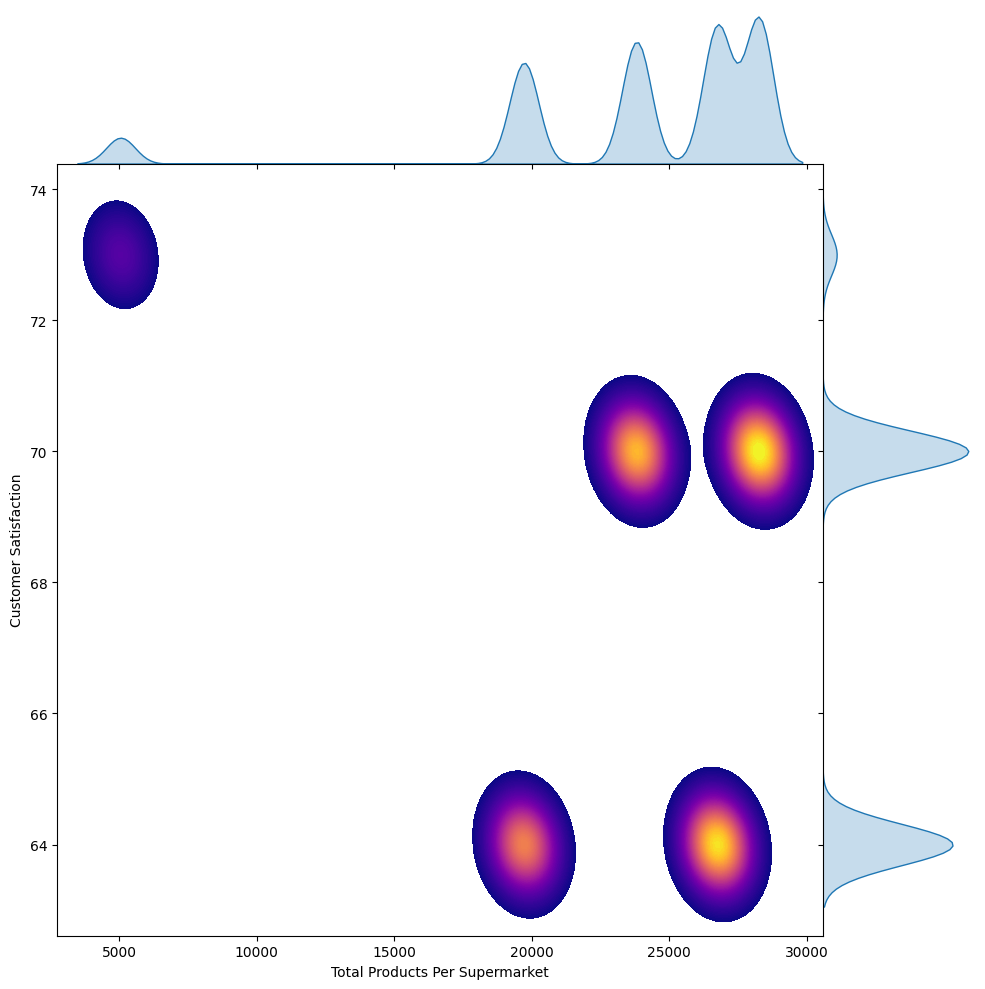

In [23]:
sns.jointplot(data=df, x='supermarket_total_products', y='customer_satisfaction', kind='kde', fill=True, space=0, cmap='plasma', height=10, ratio=5, levels=100)
plt.xlabel('Total Products Per Supermarket')
plt.ylabel('Customer Satisfaction')
plt.title('2D Density Plot of Total Products Per Supermarket vs Customer Satisfaction')
plt.show()

This 2-dimensional density plot has similar limitations to the previous plot for Price Per Product and Customer Satisfaction, as both variables are effectively categorical. The Total Products Per Supermarket is an aggregate statistic assigned to each row in the dataset. As a result, the density of values for each supermarket's total products is self-referential, meaning it reflects the total number of products, with each product having the same total product value. Similarly, the density of customer satisfaction values reflects the total number of products per supermarket, with each product having the same overall customer satisfaction score based on the supermarket it is sold in.

Therefore, I will visualise this as a bar plot with hues for customer satisfaction levels to better estimate the probability of customer satisfaction based on given total products per supermarket.

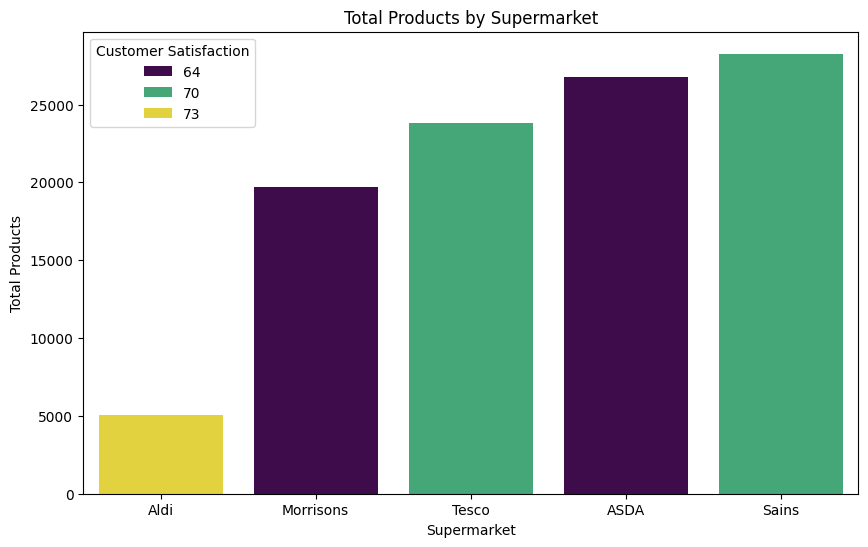

In [125]:
total_products_order = df.sort_values('supermarket_total_products')['supermarket']

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='supermarket', y='supermarket_total_products', hue='customer_satisfaction', order=total_products_order, palette='viridis')
plt.title('Total Products by Supermarket')
plt.xlabel('Supermarket')
plt.ylabel('Total Products')
plt.legend(title='Customer Satisfaction')
plt.savefig('11_bp_tp')
plt.show()

This bar plot visualises a higher probability that customer satisfaction increases as the total number of products per supermarket decreases. However, ASDA has a lower customer satisfaction score despite having a higher total number of products than Tesco. And Morrisons has a lower customer satisfaction score despite having a lower total number of products than either Sainsbury's or Tesco. This suggests that the total number of products per supermarket doesn't solely predict customer satisfaction, indicating the influence of other causal factors.

To explore this further, we'll assign product ranges to each supermarket based on the total number of products and visualise the probability density of customer satisfaction for supermarkets within the 20,001 to 30,000 product range.

In [115]:
def categorise_total_products(value):
    if 0 <= value <= 10000:
        return '0-10000'
    elif 10001 <= value <= 20000:
        return '10001-20000'
    elif 20001 <= value <= 30000:
        return '20001-30000'
    else:
        return 'Other'

if 'supermarket_product_range' not in df.columns:
    df['supermarket_product_range'] = df['supermarket_total_products'].apply(categorise_total_products)

df['supermarket_product_range'].unique()

array(['0-10000', '20001-30000', '10001-20000'], dtype=object)

In [120]:
df_filtered = df[df['supermarket_product_range'] == '20001-30000']
df_filtered['supermarket'].unique()

array(['ASDA', 'Sains', 'Tesco'], dtype=object)

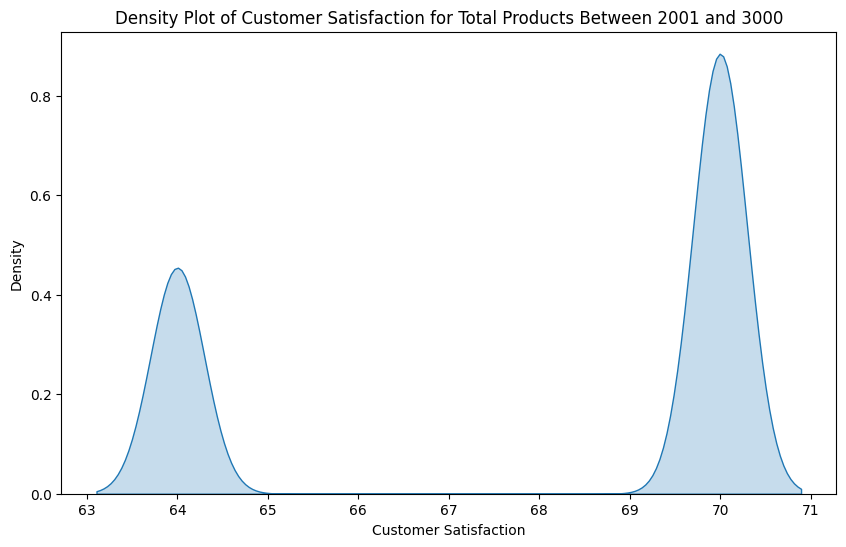

In [126]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df_filtered['customer_satisfaction'], fill=True)

plt.title('Density Plot of Customer Satisfaction for Total Products Between 2001 and 3000')
plt.xlabel('Customer Satisfaction')
plt.ylabel('Density')
plt.show()

From the above density plot, we can suggest that supermarkets falling within the range of 20,001 to 30,000 products are more likely to receive higher customer satisfaction ratings than lower ratings. This observation runs counter to the general trend noted earlier: that there is a higher probability of increased customer satisfaction as the total number of products per supermarket decreases.

This probability estimation, however, is significantly limited by the number of data points within the dataset. If we had data for other UK supermarkets, such as Marks & Spencer, Lidl, or Iceland, our results might look very different.

Furthermore, the visualisation above is influenced by the fact that it represents the distribution of the total number of products within a supermarket that received the customer satisfaction score. Given the limited data points, we know that out of the three supermarkets with a range of 20,001 to 30,000 products, two received a customer satisfaction score of 70, while one received a score of 64. Hence, from the limited data available, it appears more probable to have higher customer satisfaction scores within this range than lower scores.

#### Total Own Brand Products Per Supermarket vs Customer Satisfaction

Below, I will visualise the probability density between the total number own brand products per supermarket and customer satisfaction.

In [128]:
df['supermarket_total_own_brand_products'].unique()

array([   0,  831, 7894, 4798, 6401, 6280])

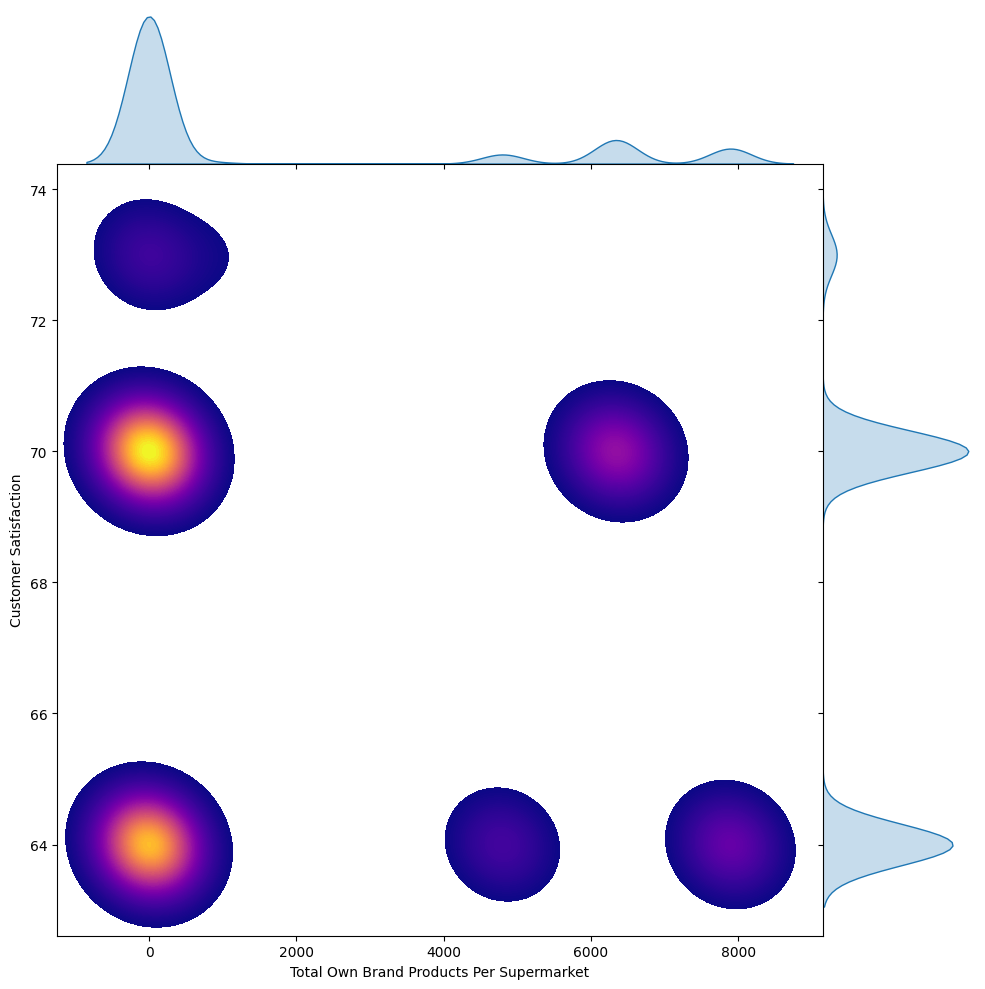

In [16]:
sns.jointplot(data=df, x='supermarket_total_own_brand_products', y='customer_satisfaction', kind='kde', fill=True, space=0, cmap='plasma', height=10, ratio=5, levels=100)
plt.xlabel('Total Own Brand Products Per Supermarket')
plt.ylabel('Customer Satisfaction')
plt.title('2D Density Plot of Total Own Brand Products Per Supermarket vs Customer Satisfaction')
plt.show()

Since the products that are not own brand products are represented by 0 in the dataset, there are higher densities around the 0 value for total own brand products. For this reason, it's best to filter these out of visualisation, which I will do below.

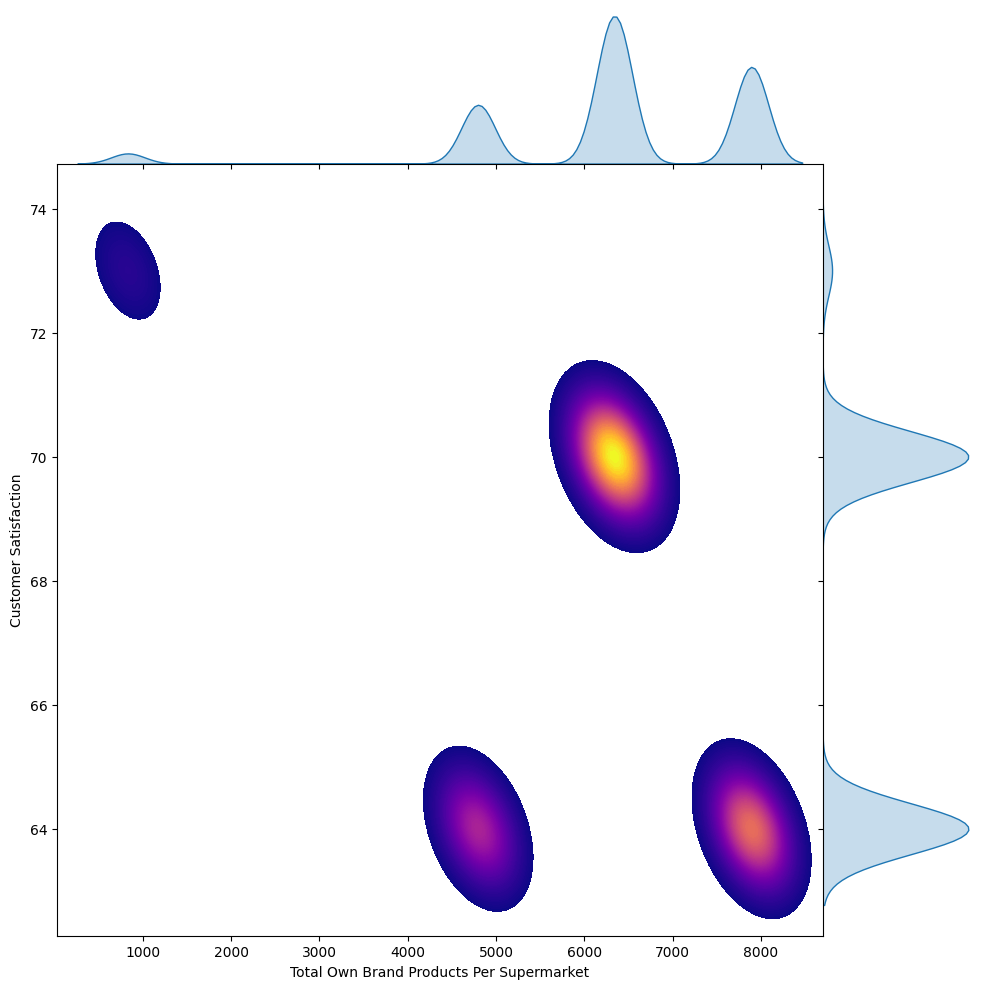

In [127]:
df_filtered = df[df['supermarket_total_own_brand_products'] != 0]
sns.jointplot(data=df_filtered, x='supermarket_total_own_brand_products', y='customer_satisfaction', kind='kde', fill=True, space=0, cmap='plasma', height=10, ratio=5, levels=100)
plt.xlabel('Total Own Brand Products Per Supermarket')
plt.ylabel('Customer Satisfaction')
plt.title('2D Density Plot of Total Own Brand Products Per Supermarket vs Customer Satisfaction')
plt.show()

This density plot presents the same limitations in data points as the above plots. The probability is better visualised in a bar plot with hues for customer satisfaction. 

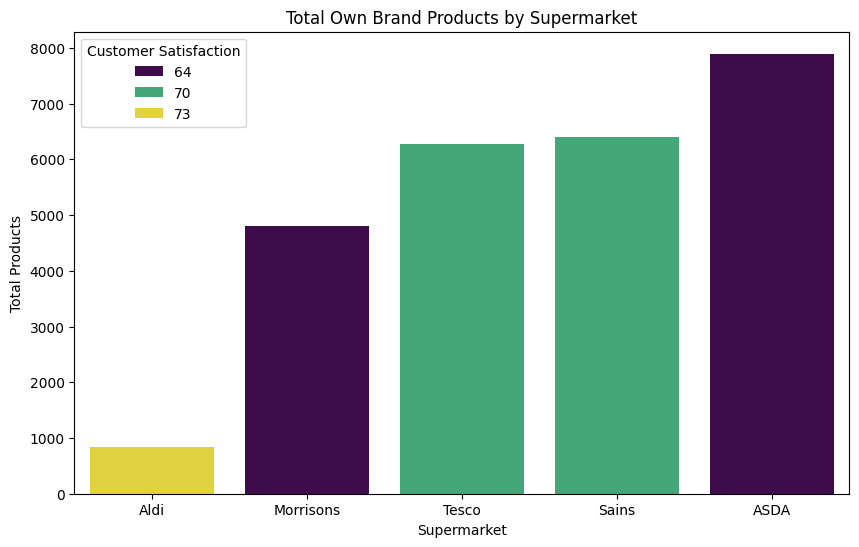

In [131]:
total_own_brand_products_order = df_filtered.sort_values('supermarket_total_own_brand_products')['supermarket']

plt.figure(figsize=(10, 6))
sns.barplot(data=df_filtered, x='supermarket', y='supermarket_total_own_brand_products', hue='customer_satisfaction', order=total_own_brand_products_order, palette='viridis')
plt.title('Total Own Brand Products by Supermarket')
plt.xlabel('Supermarket')
plt.ylabel('Total Products')
plt.legend(title='Customer Satisfaction')
plt.savefig('11_bp_tobp')
plt.show()

This bar plot suggests a higher probability that a lower total number of own brand products results in higher customer satisfaction. However, Morrisons has a lower customer satisfaction score despite having a lower total number of products than either Sainsbury's or Tesco. This indicates that having a smaller range of own brand products is not the only factor determining customer satisfaction and that other factors are at play.

Additionally, this bar plot is influenced by the total number of products per supermarket. For instance, Aldi, which has a significantly smaller range of products than the other supermarkets, will also have a significantly smaller range of own brand products. Therefore, it might be more insightful to visualise total own brand products as a percentage of total products.

In [137]:
df_filtered.loc[:, 'percentage_own_brand'] = ((df_filtered['supermarket_total_own_brand_products'] / df_filtered['supermarket_total_products']) * 100).astype(int)
df_filtered['percentage_own_brand'].unique()

array([16, 29, 24, 22, 26])

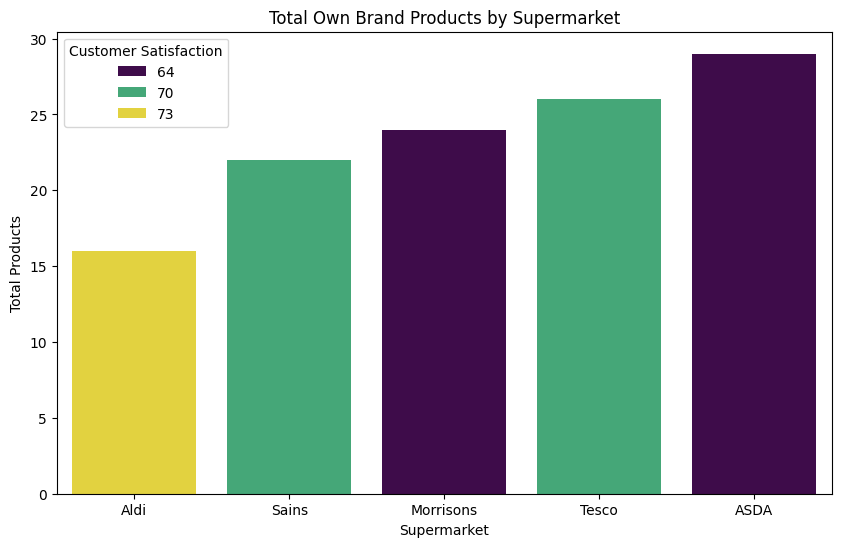

In [141]:
percentage_own_brand_order = df_filtered.sort_values('percentage_own_brand')['supermarket']

plt.figure(figsize=(10, 6))
sns.barplot(data=df_filtered, x='supermarket', y='percentage_own_brand', hue='customer_satisfaction', order=percentage_own_brand_order, palette='viridis')
plt.title('Total Own Brand Products by Supermarket')
plt.xlabel('Supermarket')
plt.ylabel('Total Products')
plt.legend(title='Customer Satisfaction')
plt.savefig('11_bp_tobp')
plt.show()

This bar plot presents a clearer picture by removing the influence of the total number of products per supermarket. While Aldi still has a lower total number of own brand products, when calculated as a percentage of total products, there is less of a difference between the other four supermarkets. The plot still suggests a higher probability that having a lower percentage of own brand products results in higher customer satisfaction. However, Morrisons has a lower customer satisfaction score despite having a lower percentage of own brand products compared to Tesco. This indicates that other factors are at play in the relationship between own brand products and customer satisfaction, one of which we will explore next: the price distribution of own brand products. 

#### Price Per Own Brand Product vs Customer Satisfaction

Finally, I will now visualise the probability density between price per own brand product (mean price) and customer satisfaction. To avoid repeating myself, I will filter the dataset to exclude values of 0.0.

In [17]:
df['price_per_own_brand_product'].unique()

array([0.  , 2.6 , 4.38, 3.88, 3.34, 3.94])

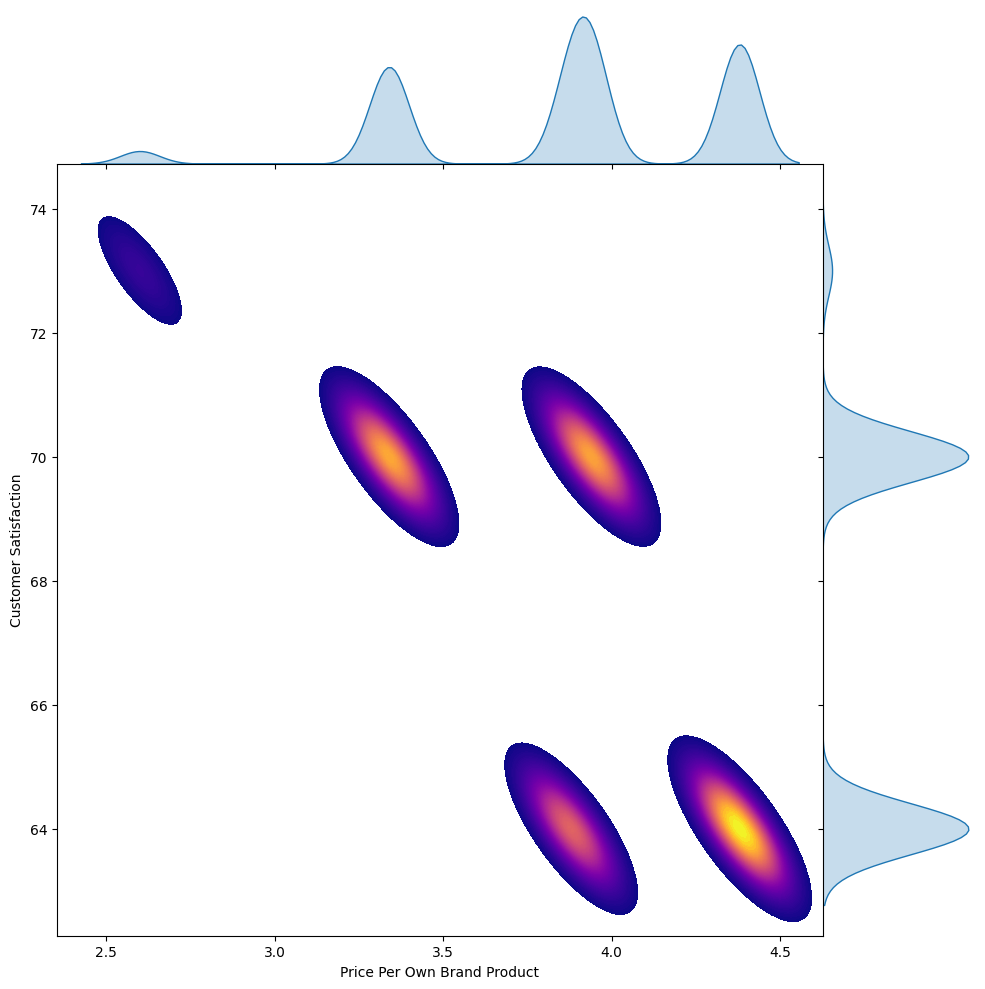

In [143]:
df_filtered = df[df['price_per_own_brand_product'] != 0.0]

sns.jointplot(data=df_filtered, x='price_per_own_brand_product', y='customer_satisfaction', kind='kde', fill=True, space=0, cmap='plasma', height=10, ratio=5, levels=100)
plt.xlabel('Price Per Own Brand Product')
plt.ylabel('Customer Satisfaction')
plt.title('2D Density Plot of Price Per Own Brand Product vs Customer Satisfaction')
plt.show()

As we can see, this 2 dimensional density plot presents the same limitations in the data as mentioned above and will be better visualised as a bar plot with customer satisfaction hues.

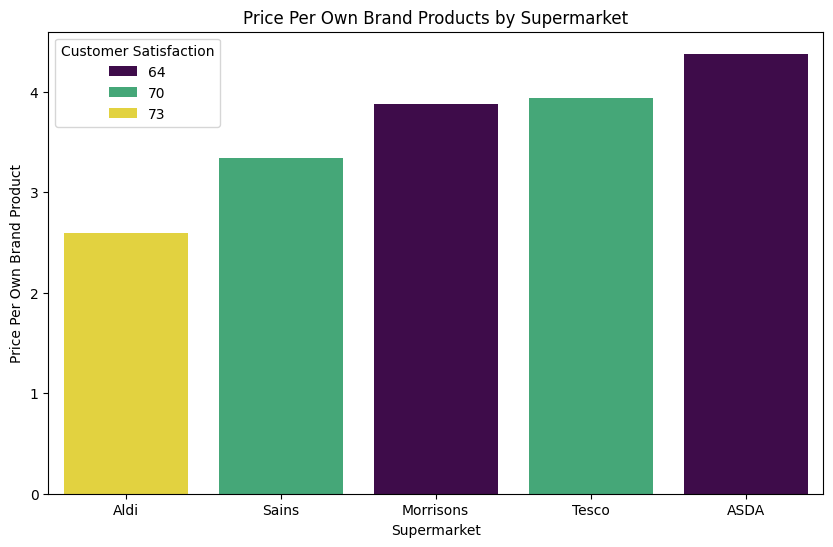

In [144]:
price_per_own_brand_products_order = df_filtered.sort_values('price_per_own_brand_product')['supermarket']

plt.figure(figsize=(10, 6))
sns.barplot(data=df_filtered, x='supermarket', y='price_per_own_brand_product', hue='customer_satisfaction', order=price_per_own_brand_products_order, palette='viridis')
plt.title('Price Per Own Brand Products by Supermarket')
plt.xlabel('Supermarket')
plt.ylabel('Price Per Own Brand Product')
plt.legend(title='Customer Satisfaction')
plt.savefig('11_bp_pobp')
plt.show()

In [145]:
df_filtered['price_per_product'].unique()

array([2.27, 5.75, 5.09, 5.54, 5.24])

In [147]:
df_filtered['price_per_own_brand_product'].unique()

array([2.6 , 4.38, 3.88, 3.34, 3.94])

This bar plot shows a similar trend to the previous one, indicating a higher probability of high customer satisfaction scores with lower average prices of own brand products. However, Tesco receives a higher customer satisfaction score despite having a marginally higher average price of own brand products than Morrisons, which has a much lower customer rating. This suggests that other causal factors outside of the data influence customer satisfaction.

Interestingly, it's worth noting that Aldi has a higher average price of own brand products compared to the average price of products overall, while the other supermarkets have lower average prices of own brand products compared to the overall average prices. This indicates a difference in strategy for own brand products. Aldi focuses on more premium own brand products, while the other supermarkets focus on budget products. This may be due to Aldi's pricing strategy of providing low everyday prices, which allows the supermarket to focus on more premium own brand products.

### Manual Anecdotal Analysis

Given that the rows in the dataset relate to products and the values in the customer satisfaction column relate to supermarkets, manually examining rows will probably not be fruitful in gaining a deeper understanding of the context and potential confounding factors behind the observed relationships. For example, retrieving rows that are consistent with potential causal relationships will simply return the entire products from the supermarket or supermarkets with the specific customer satisfaction score. 

In [150]:
supermarkets_with_scores_over_70 = df[df['customer_satisfaction'] > 70]

supermarkets_with_scores_over_70

,supermarket,price,price_per_unit,unit,product_name,category,own_brand,customer_satisfaction,supermarket_total_products,supermarket_total_own_brand_products,price_per_product,price_per_own_brand_product,price_range,supermarket_product_range
0,Aldi,1.69,0.37,kg,Plant Menu Vegetable Burgers 454g/4 Pack,free-from,False,73,5058,0,2.27,0.0,0-5,0-10000
1,Aldi,1.69,0.37,kg,Plant Menu Spicy Bean Burgers 454g/4 Pack,free-from,False,73,5058,0,2.27,0.0,0-5,0-10000
2,Aldi,1.69,3.70,kg,Plant Menu No Chicken Burgers 227g/2 Pack,free-from,False,73,5058,0,2.27,0.0,0-5,0-10000
3,Aldi,1.69,7.40,kg,Veggie Menu Bean & Vegetable Burgers 227g/2 Pack,free-from,False,73,5058,0,2.27,0.0,0-5,0-10000
4,Aldi,1.49,3.70,kg,Plant Menu No Chicken Pies 2x200g,free-from,False,73,5058,0,2.27,0.0,0-5,0-10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5053,Aldi,2.99,8.80,kg,Purewick Cosy Days Jar Candle 340g,household,False,73,5058,0,2.27,0.0,0-5,0-10000
5054,Aldi,2.99,8.80,kg,Purewick Cherry & Vanilla Jar Candle 340g,household,False,73,5058,0,2.27,0.0,0-5,0-10000
5055,Aldi,3.19,0.01,unit,Saxon Kitchen Roll 3 Rolls,household,False,73,5058,0,2.27,0.0,0-5,0-10000
5056,Aldi,3.49,0.19,l,Surf Washing Capsules Tropical Lily 3 In 1 Cap...,household,False,73,5058,0,2.27,0.0,0-5,0-10000


As we can see here, there are 5,058 rows, representing the all the products from the supermarket Aldi. For this reason, I will list the causal relationships found in the previous section, for the purposes of clarification.

    1. The lower the prices of products, the higher the customer satisfaction.
    2. The lower the mean price of products, the higher the customer satisfaction.
    3. The lower the range of products, the higher the customer satisfaction.
    4. The lower the range of own brand products, the higher the customer satisfaction.
    5. The lower the mean price of own brand products, the higher the customer satisfaction.

These causal relationships illustrate general trends derived from limited data and there are exceptions to each relationship. For almost all of the causal relationships visualised above, Tesco and Sainsbury's have higher customer satisfaction scores to ASDA and Morrisons, despite having similar causal values. The one exception is for the relationship between price per own brand products and customer satisfaction, where Sainsbury's value falls more on what would be the correlation line, if it was meaningful to include it. 

Nevertheless, the inconsistencies between Sainsbury's/Tesco and ASDA/Morrisons suggest that there are other causal factors at work, which makes sense, given the limited range of causal factors that the dataset allows us to examine. To generate theories about what these causal factors consist of, it is necessary to gather additional information from relevant sources.

When I asked ChatGPT, if there is anything that Sainsbury's and Tesco do differently to ASDA and Morrisons, it listed the following:

**Unique Aspects Tesco and Sainsbury’s Do That Asda and Morrisons Don’t**
* **Data-Driven Personalization**: The extensive use of customer data to personalize shopping experiences is more advanced in Tesco and Sainsbury's compared to Asda and Morrisons.
* **Comprehensive Digital Strategies**: Both Tesco and Sainsbury’s have stronger digital engagement strategies, including advanced online shopping platforms and active use of social media for customer interactions.
* **Sustainability Commitment**: Both Tesco and Sainsbury’s have well-defined sustainability programs that appeal to environmentally conscious customers, a focus that may not be as pronounced in Asda and Morrisons.
* **Innovative Customer Engagement**: Tesco and Sainsbury’s engage with customers through unique and personalized marketing campaigns, leveraging their loyalty programs more effectively to build long-term customer relationships.

This emphasis on loyalty programmes and the data that this provides supermarkets was something that my expert emphasised both in the initial interview and subsequent follow-ups. Both Sainsbury's and Tesco use the data collected from their loyalty cards to personalise offers, enhance the customer experience and customise their marketing strategies. Data-driven loyalty programmes provide detailed insights into customer behaviors, preferences and trends, allowing for better decision-making. In other words, both Sainsbury's and Tesco have the advantage of being able to analyse very large amounts of data - attained through their loyal cards - to provide insights into  the key causal factors of customer satisfaction, as I'm trying to do here - albeit with significantly less data!

My expert also talked about a greater number and distribution of stores being a potential factor in customer satisfaction, since people may frequent a particular supermarket simply because it's convenient for them to travel to. This is the case for most people in the inner city area within which his store is located, which is the most convenient store for many to shop in. My expert went on to suggest that Sainsbury's and Tesco have been able to build and maintain this wider infrastructure of stores due to their position as market leaders for decades. This has naturally built up a significant amount of brand trust and recognition among the public, which influences customer satisfaction and why someone would go to one supermarket over another.

When I mentioned the general trends I discovered in my analysis, my expert was quite dismissive. Whilst he is aware that customers value lower prices, he also firmly believes that customer satisfaction is a value that has a multitude of causal factors. He thinks that, although discount supermarkets like Aldi and Lidl have been successful in offering customers low every day prices over the past decade, this has often come at the detriment of other factors that contribute to customer satisfaction. And, since competing with Aldi and Lidl in offering the same distribution of low prices would mean reducing the size of stores, product ranges, brand names and many other aspects of the traditional supermarket, he thinks customer satisfaction and market share can be maintained by focusing on other factors and being proactive in responding to various market changes.

This information makes sense when looking again at the Which? supermarket survey for 2024, from which I took the customer satisfaction scores (https://www.which.co.uk/reviews/supermarkets/article/best-supermarkets-aOJjN2J0A10N). As seen here, the top supermarket in UK for customer satisfaction is Marks & Spencer, a premium supermarket that undoubtedly has a higher distribution of prices than either of the four traditional supermarkets I've analysed in this project. In the survey, it received 2 out 5 stars for 'value for money', whereas Aldi - which was second best for customer satisfaction - received 4 out of 5 stars. 

Additionally, it received a 4 out 5 stars for 'product range' - the same as Sainsbury's and Tesco. ASDA and Morrisons both scored 3 out of 5 stars for product range. According to Which?, the most notable factors in Marks & Spencer's success were 'overall customer service', 'staff availability and helpfulness', 'store appearance' and 'overall quality of own-label and fresh products' - all of which the supermarket scored 5 stars in. 

This last attribute is interesting, given our analysis of own brand products above. Whilst we were limited to analysing the range of own brand products, the quality of them was outside of the limitations of our data. Sainsburys and Tesco scored 4 stars, Aldi and Morrisons scored 3 and ASDA scored 2. Despite having the highest total number of own products, as we discovered above, ASDA has the lowest quality ratings. As the old adage goes, "quality over quantity".

### Testing Hypotheses

To test the causal relationships I listed in the previous section, I must first come up with hypotheses for each. 


*The lower the prices of products, the higher the customer satisfaction.*

Firstly, that a lower distribution of prices results in higher customer satisfaction sounds self-evident - especially in periods of economic downturn and price inflation. However, if we had more supermarkets represented in our dataset and used the same customer satisfaction scores from the 2024 Which? supermarket survey, it would reveal that the other discount supermarket, Lidl, have lower customer service scores than either Sainsbury's or Tesco - receiving 68%. This is the third lowest in the survey, above ASDA and Morrisons. Although Lidl scored 4 out of 5 stars for the 'value for money' metric, as did Aldi, it received 2 stars for all other metrics. This would suggest that, although low prices affect customer satisfaction, if other causal factors are ignored, customer satisfaction will be low. Conversely, if supermarkets focus on increasing other causal factors, such as customer service, store appearance and food quality, high prices will be overlooked by the customer.


*The lower the mean price of products, the higher the customer satisfaction.*

When it comes to the price per product - or mean price per supermarket - it appears that there could be a confounding factor work, even though we tried to remove the effect of this factor when calculating the price per product. This potential confounding factor is the total number of products. Supermarkets with a wider product range might have a mix of both high-priced and low-priced items, potentially raising the average price level. They might also offer premium and niche products which can elevate the average price level. However, supermarkets with a narrower product range might focus on essential and low-cost items, potentially lowering the average price level.

Furthermore, a wider product range can increase customer satisfaction by offering more choices and catering to diverse preferences. Customers might also perceive supermarkets with a broader range as providing better value, enhancing their overall satisfaction. Additionally, the availability of a variety of products can improve the shopping experience, contributing to higher satisfaction scores.

Thus, the product range can directly affect customer satisfaction due to increased choice and perceived value, as well as product prices, which in turn affects customer satisfaction. For example, a supermarket with a wide range might include premium products that increase the average price but also enhance satisfaction due to perceived quality and variety. In this sense, a lower average price might not necessarily cause a higher customer satisfaction score. This might simply be a result of Aldi having a lower product range than the other supermarkets.


*The lower the range of products, the higher the customer satisfaction.*

Next, the pattern of lower ranges of products resulting in higher customer satisfaction seems counter-intuitive. One would expect customers to be more satisfied by greater varieties of products. In this sense, pricing could be a confounding factor in this relationship. Supermarkets that focus on maintaining low prices might achieve this by limiting their product range to essential, high-turnover items, which can be bought in bulk at lower costs. In addition, a narrower product range helps in reducing operational complexity and costs, enabling supermarkets to offer lower prices.

As suggested above, low prices can significantly enhance customer satisfaction, especially among price-sensitive shoppers.Customers might frequent a supermarket primarily because of its low prices and this satisfaction might overshadow the narrower product range. 

Thus, in short, low prices directly enhance customer satisfaction due to affordability, whilst influencing the supermarket's product range strategy, leading to a narrower range, which might in turn affect customer satisfaction differently. For this reason, a lower range of products might not necessarily result in higher customer satisfaction. It might just seem this way because Aldi is committed to a strategy of providing low every day prices, limiting its product range in the process.


*The lower the range of own brand products, the higher the customer satisfaction.*

This suggests that own brand products fail to have their desired effect on customers and that having less of them actually results in higher customer satisfaction. While the visualisation in this report don't present a strong relationship between the two (as is the case for all the rest of the visualisations), it again seems counter-intuitive. The price of own brand products could have an effect on this relationship, as a confounding factor.

Supermarkets with a lower mean price for own brand products might focus on offering fewer, essential and budget-friendly items. Conversely, those with a higher mean price might offer a broader range, including premium and specialty items. A higher mean price could indicate a strategy of fewer but higher-quality own brand products, whereas a lower mean price might suggest a strategy focusing on a wide array of affordable options.

The mean price of own brand products can significantly affect customer satisfaction. Lower prices may enhance satisfaction among price-sensitive customers, while higher prices might appeal to those looking for higher quality. Higher mean prices might be associated with better quality own brand products, which can enhance customer satisfaction.

Thus, the mean price of own brand products can directly influence customer satisfaction through perceived value and quality, while also influencing the supermarket's strategy regarding the number of own brand products offered, which in turn affects customer satisfaction. Therefore, lower ranges of own brand products might not result in higher customer satisfaction. It might actually be Aldi's low prices.


*The lower the mean price of own brand products, the higher the customer satisfaction.*

Once again, this seems self-evident. However, both the mean price of own brand products and customer satisfaction might be influenced by the total number of own brand products. 

A supermarket with a limited range of products might focus on essential, high-turnover items that are generally priced lower. This focus could lead to a lower average price for own brand products. By limiting the range of products, the supermarket might achieve greater cost efficiency, enabling them to offer lower prices on the products they do carry.

A limited range of products might appeal to price-sensitive customers who prioritize low prices over variety, thereby increasing customer satisfaction despite the narrower selection. Some customers might prefer a shopping experience with fewer options, which could enhance satisfaction if they perceive the available products to meet their needs at lower prices.

Thus, a low range of products can directly affect customer satisfaction by simplifying the shopping experience and focusing on affordability, while influencing the average price of own brand products (since fewer, lower-priced essentials are offered), which in turn affects customer satisfaction. For this reason, a lower mean price of own brand products might not necessarily affect customer satisfaction the way it's presented in our visualisations. It might appear this way merely because Aldi has a lower product range.


#### Test

In the interests of time, I will refine the hypotheses to include the following:

##### Price Per Product (Mean Price) As a Confounding Factor

*Lower Product Range Directly Increases Satisfaction*

The observed trend suggests that a smaller product range could directly lead to higher customer satisfaction by simplifying choices and reducing decision fatigue.

*Lower Pricing Increases Satisfaction (Product Range is Secondary)*

The trend might be driven primarily by lower prices, with supermarkets offering fewer products to maintain lower costs. Customer satisfaction might actually be more about pricing than product range.

*Pricing and Product Range Both Independently Influence Satisfaction*

Both lower pricing and a narrower product range independently contribute to higher satisfaction, and their effects might be additive or interacting.

*Other Factors Influence Satisfaction*

Factors other than price and product range (e.g., customer service, store experience, loyalty programs) significantly contribute to customer satisfaction, explaining why Tesco and Sainsbury’s outperform ASDA and Morrisons.

##### Total Products (Product Range) As a Confounding Factor

*Lower Prices Directly Increase Satisfaction*

The observed trend suggests that lower prices per product, after accounting for product range, could directly lead to higher customer satisfaction by offering better value for money.

*Product Range Increases Satisfaction (Pricing is Secondary)*

A broader product range might increase customer satisfaction by providing more options, making the impact of price less significant.

*Product Range and Pricing Both Independently Influence Satisfaction*

Both the number of products and their prices separately contribute to customer satisfaction, with each factor playing an important role.

*Other Factors Influence Satisfaction*

Factors beyond product range and price (e.g. customer service, store experience) are crucial in driving customer satisfaction, particularly in supermarkets like Tesco and Sainsbury’s.


#### Controlled Circumstances

Since pricing could be confounding the relationship between product range and customer satisfaction, controlling for this in the analysis is crucial. To do this I will create a normalised product range variable by dividing the total product range by the mean price for each supermarket. This will help in assessing the impact of product range on customer satisfaction while holding the effect of pricing constant.

I will then create pair plots that show the relationship between customer satisfaction and the original product range, then between customer satisfaction and the normalised product range. Then I will analyze whether the slight trend of lower product ranges leading to higher satisfaction still holds after controlling for pricing.

If the trend persists after normalisation, this suggests that product range might indeed have a direct influence on customer satisfaction. If the trend weakens or disappears, this indicates that the relationship may have been confounded by pricing, and pricing is the more significant driver of satisfaction.


#### Additional Data

Since we are limited by the data points in our dataset, to further test the hypotheses, products could be scraped from the websites of other UK supermarkets - particularly Marks & Spencer's and Lidl, since the customer satisfaction scores they received from the 2024 Which? supermarket survey both run counter to the general trends identified in this chapter.

## 5.2 Confounding Factors

### Hypotheses

Due to limited time, and to save repeating myself, I will merely state that in the above section, I have listed the potential confounding factors hypothesised in the different causal relationships, as well as described and explained their potential influence on both x and y. For the sake of transparency, I will list the potential confounding factors below:

* Price Per Product (Mean Price) is a potential confounding factor on the relationship between Customer Satisfaction and Total Products Per Supermarket.
* Total Products Per Supermarket is a potential confounding factor on the relationship between Customer Satisfaction and Price Per Product (Mean Price).
* Price Per Own Brand Product is a potential confounding factor on the relationship between Customer Satisfaction and Total Own Brand Products Per Supermarket.
* Total Own Brand Products Per Supermarket is a potential confounding factor on the relationship between Customer Satisfaction and Price Per Own Brand Product (Mean Price of Own Brand Products).

However, since I am limited by time, I will focus on the following hypotheses:

##### Price Per Product (Mean Price) As a Confounding Factor

1. *Lower Product Range Directly Increases Satisfaction*

2. *Lower Pricing Increases Satisfaction (Product Range is Secondary)*

3. *Pricing and Product Range Both Independently Influence Satisfaction*

4. *Other Factors Influence Satisfaction*


##### Total Products (Product Range) As a Confounding Factor

1. *Lower Prices Directly Increase Satisfaction*

2. *Product Range Increases Satisfaction (Pricing is Secondary)*

3. *Product Range and Pricing Both Independently Influence Satisfaction*

4. *Other Factors Influence Satisfaction*

### Accounting For Confounding Factors

I will now follow the process, as described in the 'Controlled Circumstances' section above.

#### Normalised Total Products

In [161]:
df['normalised_product_range'] = (df['supermarket_total_products'] / df['price_per_product']).astype(int)
df['normalised_product_range'].unique()

array([2228, 4653, 3875, 5101, 4545])

Let's look at the original scatter plot for the relationship between total products per supermarket and customer satisfaction.

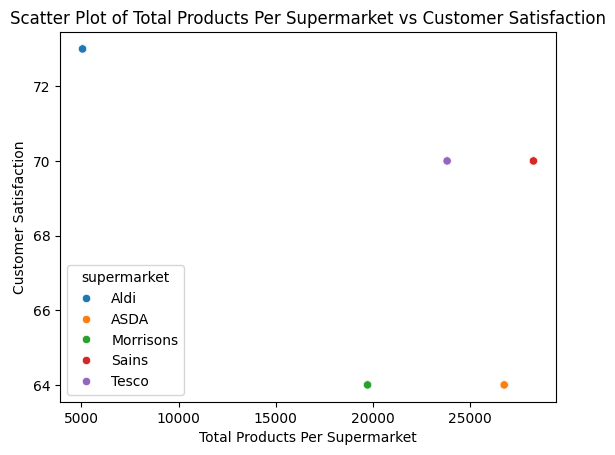

In [162]:
sns.scatterplot(data=df, x='supermarket_total_products', y='customer_satisfaction', hue='supermarket')
plt.xlabel('Total Products Per Supermarket')
plt.ylabel('Customer Satisfaction')
plt.title('Scatter Plot of Total Products Per Supermarket vs Customer Satisfaction')
plt.savefig('cs_total_products_plot.png')
plt.show()

And now the relationship between normalised product range and customer satisfaction to detect any changes.

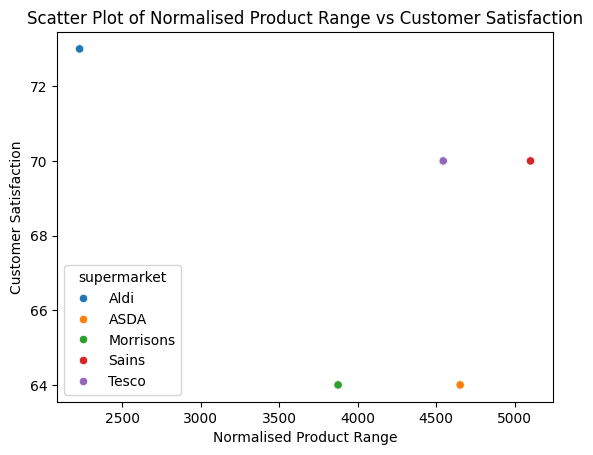

In [164]:
sns.scatterplot(data=df, x='normalised_product_range', y='customer_satisfaction', hue='supermarket')
plt.xlabel('Normalised Product Range')
plt.ylabel('Customer Satisfaction')
plt.title('Scatter Plot of Normalised Product Range vs Customer Satisfaction')
plt.savefig('cs_norm_total_products_plot.png')
plt.show()

#### Results

As we can see, the scatter plot for normalised product range remains almost identical. I'll now go through the hypotheses one by one.

1. *Lower Product Range Directly Increases Satisfaction*

*Partially True*: The high customer satisfaction seen with Aldi, despite its lower product range, supports the idea that a smaller product range can directly increase satisfaction by simplifying choices. However, this relationship doesn't seem to apply universally, as Tesco and Sainsbury’s still maintain high satisfaction with broader ranges.

2. *Lower Pricing Increases Satisfaction (Product Range is Secondary)*

*Partially True*: Aldi's high satisfaction scores with low prices suggest that pricing is a key factor in satisfaction, potentially more so than product range in certain cases. However, since normalizing the product range by mean price didn’t significantly alter the relationship, it suggests that product range is not entirely secondary and may still play an important role.

3. *Pricing and Product Range Both Independently Influence Satisfaction*

*True*: Since the scatter plots did not change significantly after normalization, it suggests that both pricing and product range independently influence customer satisfaction. This means that neither factor completely overshadows the other—they both contribute to satisfaction in their own ways.

4. *Other Factors Influence Satisfaction*

*True*: Given that Tesco and Sainsbury’s have higher customer satisfaction despite having broader product ranges and similar pricing to ASDA and Morrisons, it’s likely that other factors such as product quality, customer service, and store experience are also playing a significant role in driving satisfaction.


#### Conclusion

The data supports the idea that both pricing and product range independently influence customer satisfaction, with other factors like service and quality likely also playing a significant role. While lower product range and pricing can increase satisfaction, they are not the sole determinants — other elements must be considered to fully understand customer satisfaction in the context of these supermarkets. Additionally, data from other supermarkets would significantly enrich our findings and provide more insightful results.

#### Normalised Mean Price

Let's look at the scatter plot for the relationship between original price per product/mean price and customer satisfaction.

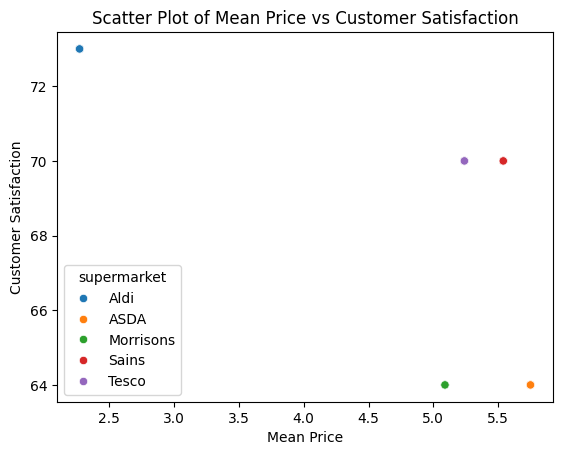

In [171]:
sns.scatterplot(data=df, x='price_per_product', y='customer_satisfaction', hue='supermarket')
plt.xlabel('Mean Price')
plt.ylabel('Customer Satisfaction')
plt.title('Scatter Plot of Mean Price vs Customer Satisfaction')
plt.savefig('cs_mean_price_plot.png')
plt.show()

And now the scatter plot for the relationship between the normalised mean price and customer satisfaction, to see if anything changes.

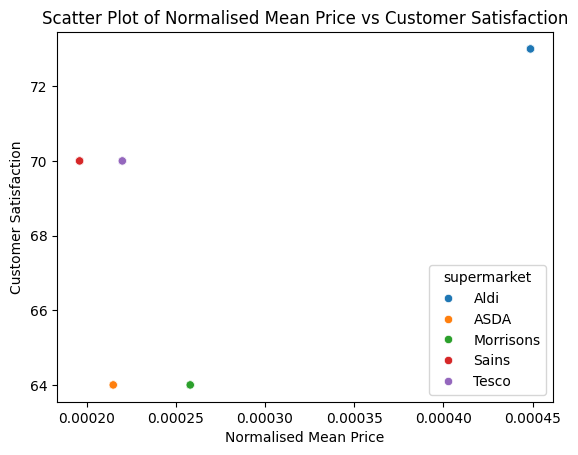

In [170]:
df['normalied_mean_price'] = df['price_per_product'] / df['supermarket_total_products']
sns.scatterplot(data=df, x='normalied_mean_price', y='customer_satisfaction', hue='supermarket')
plt.xlabel('Normalised Mean Price')
plt.ylabel('Customer Satisfaction')
plt.title('Scatter Plot of Normalised Mean Price vs Customer Satisfaction')
plt.savefig('cs_norm_mean_price_plot.png')
plt.show()

#### Results

As we can see, the scatter plot for normalised mean price is essentially flipped. I'll now go over the hypotheses one by one.

1. *Lower Prices Directly Increase Satisfaction*

*Partially True*: The normalized mean price scatter plot suggests that while lower prices generally correlate with higher customer satisfaction, this relationship can change when accounting for product range. The flip in the plot indicates that pricing may become less important when a wide variety of products is offered, suggesting that price is not the only factor driving satisfaction.

2. *Product Range Increases Satisfaction (Pricing is Secondary)*

*True*: The data shows that a broader product range can enhance customer satisfaction, even if prices are higher. The reversal in the scatter plot after normalization indicates that product range might be more critical than pricing in determining satisfaction, making price secondary in certain contexts.

3. *Product Range and Pricing Both Independently Influence Satisfaction*

*True*: The scatter plots indicate that both product range and pricing independently contribute to customer satisfaction. However, their influence varies depending on the context, with product range sometimes taking precedence over price.

4. *Other Factors Influence Satisfaction*

*True*: The higher customer satisfaction scores for Tesco and Sainsbury’s, despite having higher prices and broader product ranges, suggest that factors like product quality, customer service, and store experience also play significant roles in influencing satisfaction.

#### Conclusion

The data supports the idea that while lower prices and a more focused product range generally increase satisfaction, the importance of these factors can vary depending on the context. Product range can sometimes take precedence over price, making pricing secondary in driving satisfaction. Additionally, other factors such as service quality and the overall shopping experience are crucial in shaping customer satisfaction. Expanding the dataset to include more supermarkets could further enrich these findings and provide deeper insights into what drives customer satisfaction.

## 5.3 Conclusions & Further Work

### 1. Conclusions

The causal analysis in this chapter provides several insightful recommendations for enhancing customer satisfaction within the supermarket industry. The findings underscore the significant influence of pricing strategies, product ranges and confounding factors on customer satisfaction, offering valuable guidance for decision-makers seeking to refine their strategic approaches.

The most impactful recommendation is to optimise product ranges by focusing on high-demand items coupled with competitive pricing strategies. This approach, supported by the causal relationships identified in the analysis, suggests that supermarkets can enhance customer satisfaction by aligning their offerings more closely with customer preferences.

However, it is important to note that the analysis was conducted with a limited number of data points for customer satisfaction. The inclusion of data from additional supermarkets, as suggested in the previous chapter, would provide a more comprehensive understanding of the causal factors affecting customer satisfaction. This broader dataset would help validate the current findings and make the insights more valuable and generalisable across the industry.

Moreover, the analysis highlights the need for a deeper investigation into the factors contributing to the success of outliers such as Sainsbury's and Tesco. Understanding the unique strategies that drive higher customer satisfaction in these supermarkets, despite broader trends, could provide actionable insights that are applicable across the industry.

In summary, this chapter's recommendations are prioritised based on their potential to significantly improve customer satisfaction. However, the limitations of the current dataset and the potential for further insights highlight the importance of ongoing analysis and data collection to refine and validate these recommendations.

### 1. Further Work

To build on the causal analysis conducted in this chapter, several key areas should be explored further to deepen our understanding and enhance the robustness of the findings.

One immediate step would be to investigate the specific factors that contribute to the success of outliers such as Sainsbury's and Tesco. By conducting a more detailed analysis of these supermarkets, including factors such as customer loyalty programmes, in-store experiences or brand perception, we could gain a clearer understanding of why they deviate from the broader trends observed in the data. This deeper exploration could reveal best practices that could be applied across the industry.

Another promising area for further work is the incorporation of more comprehensive customer service metrics, such as the UK Customer Satisfaction Index (UKCSI), into the analysis. While the current chapter has relied on available data, including these additional metrics would allow us to validate our findings and explore multiple dimensions of customer satisfaction. This would provide a more nuanced view of how various factors contribute to overall satisfaction levels.

Additionally, extending the analysis by gathering more granular data, such as product-level reviews or feedback, could offer valuable insights into the specific elements that drive customer satisfaction. This data could be visualised through density plots or other methods to examine how product-level satisfaction correlates with broader customer sentiment.

Given the limitations of the current dataset, expanding the analysis to include data from additional supermarkets over an extended period is crucial. As mentioned in the previous chapter, scraping data from other supermarkets would allow for more comprehensive comparisons and a better understanding of the causal factors affecting customer satisfaction. This broader dataset would make the insights more valuable and applicable across the industry.

In conclusion, while the analysis conducted in this chapter provides a solid foundation, further work is necessary to fully understand the complex dynamics at play. By focusing on these areas, we can extend the most impactful parts of the causal analysis and provide more actionable insights that drive meaningful improvements in customer satisfaction.